# [Wrap-up quiz 4](https://inria.github.io/scikit-learn-mooc/linear_models/linear_models_wrap_up_quiz.html)

In [1]:
import pandas as pd

ames_housing = pd.read_csv('./datasets/ames_housing_no_missing.csv')
target_name = 'SalePrice'
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0)
)

cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

/home/ageo/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ageo/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ageo/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ageo/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ageo/.local/lib/python3.10/site-packages/sklearn/linea

In [5]:
for fold in range(len(cv_results['estimator'])):
    print(f"Fold #{fold}")
    print(f"The largest absolute value of the weight (coefficient) is "
       f"{cv_results['estimator'][fold][-1].coef_.max()}")

Fold #0
The largest absolute value of the weight (coefficient) is 41751.55185234708
Fold #1
The largest absolute value of the weight (coefficient) is 95493.45153078104
Fold #2
The largest absolute value of the weight (coefficient) is 31672.854410366945
Fold #3
The largest absolute value of the weight (coefficient) is 54583.28610646963
Fold #4
The largest absolute value of the weight (coefficient) is 43553.91562983337
Fold #5
The largest absolute value of the weight (coefficient) is 35431.558323907164
Fold #6
The largest absolute value of the weight (coefficient) is 74545.46012751396
Fold #7
The largest absolute value of the weight (coefficient) is 7.214893720271846e+18
Fold #8
The largest absolute value of the weight (coefficient) is 1.7780411103138819e+18
Fold #9
The largest absolute value of the weight (coefficient) is 2.2755095044241795e+18


In [6]:
model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)
data_numerical = data[numerical_features]
cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

In [7]:
for fold in range(len(cv_results['estimator'])):
    print(f"Fold #{fold}")
    print(f"The largest absolute value of the weight (coefficient) is "
       f"{cv_results['estimator'][fold][-1].coef_.max()}")

Fold #0
The largest absolute value of the weight (coefficient) is 20867.286383259656
Fold #1
The largest absolute value of the weight (coefficient) is 20329.015171924726
Fold #2
The largest absolute value of the weight (coefficient) is 19764.50791273507
Fold #3
The largest absolute value of the weight (coefficient) is 20169.59262608038
Fold #4
The largest absolute value of the weight (coefficient) is 19571.095410466394
Fold #5
The largest absolute value of the weight (coefficient) is 22562.769198255974
Fold #6
The largest absolute value of the weight (coefficient) is 20127.655973644076
Fold #7
The largest absolute value of the weight (coefficient) is 20032.645971187558
Fold #8
The largest absolute value of the weight (coefficient) is 17142.30998419708
Fold #9
The largest absolute value of the weight (coefficient) is 19144.189168869158


In [8]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
coefs_ridge = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=numerical_features)

In [9]:
weights_ridge

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-476.754038,1395.265868,7657.727958,8808.084233,-269.703768,2933.250315,11936.833677,10101.976360,11966.640153,-1560.403619,...,3343.709544,20867.286383,-1862.727463,4547.287091,2195.085772,-2102.823437,1697.856940,1685.347396,-2024.619474,378.544940
1,-1014.941352,1150.580724,6620.700545,8565.024170,-70.053229,3087.955340,11956.500135,9935.653200,11841.466887,-2770.569902,...,3230.651161,20329.015172,-2320.141348,5400.151749,1700.736001,-3120.965207,883.477224,740.771764,-1786.461511,297.451367
2,-150.876387,493.591270,6843.024664,8498.092288,-658.039034,3238.457525,11859.105753,9363.204570,11954.290467,-1691.339324,...,3340.471569,19764.507913,-1225.551540,5533.832881,1812.416635,-2642.142579,1068.534756,1956.118214,-1761.652154,-1050.602603
3,-233.390058,1968.789237,7822.622938,7967.955293,-561.667200,2709.316503,10989.135615,11243.005735,12777.655159,-1825.118416,...,2145.052452,20169.592626,-1943.885464,4447.825185,3030.459490,-2750.448784,828.462773,1596.273553,-2178.364964,303.711725
4,442.991887,1381.008329,6145.027307,7862.001820,218.607366,3240.788725,11407.896232,8664.061930,11417.665779,-1910.699121,...,3636.999322,19571.095410,320.408726,3938.958046,1973.950344,-2466.365099,982.238617,1960.759128,-1610.267541,-6.210630
5,337.586500,1280.302144,6204.965602,8604.518987,-168.769685,2228.213769,11083.678123,10854.619591,12301.406783,-1488.188974,...,3413.367678,22562.769198,-3183.723296,4835.891524,2113.457778,-2526.139845,1051.314980,1376.681166,-2244.483092,274.093027
6,-490.130594,1808.916632,6963.780573,8122.074016,358.820285,3629.729164,12190.068143,8744.488333,12782.039014,-1439.212728,...,3062.024439,20127.655974,-946.622962,5791.918839,2543.733411,-2578.047570,1548.591961,1958.297563,-1806.929258,252.541283
7,-627.947825,1325.538815,6956.567906,8081.283989,-413.641028,2405.945256,10673.168368,10824.482553,11239.374795,-1280.035931,...,3758.486675,20032.645971,-639.301222,5400.543988,2065.721831,-3391.962390,1050.305327,1611.829741,-1884.893780,313.419320
8,2813.950135,2601.096893,6467.069111,11098.319437,-619.709950,4175.634363,15693.414764,7710.687901,13642.435186,-1735.103867,...,2269.276106,11610.344076,4626.005696,3287.994032,2027.444655,-3110.866623,32.953000,1282.296379,71.092558,607.322413
9,19.595844,1675.831347,6945.154935,8134.095079,198.754703,3133.306199,11688.584625,9576.941376,12096.912771,-1482.866295,...,2670.548528,19144.189169,-80.015915,4446.456303,1493.838234,-2663.425470,293.709642,2172.624444,-2419.756875,102.347305


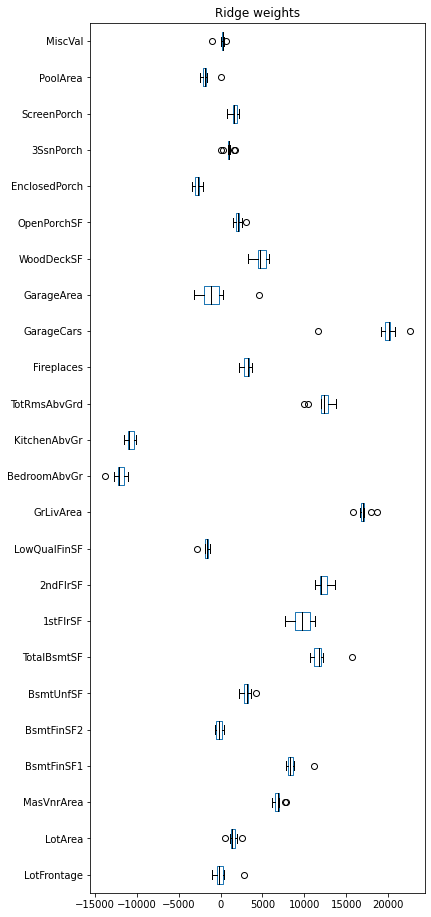

In [10]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

In [11]:
weights_ridge.GarageCars.std()

2895.2876461017318

The two most important features used by the ridge regressor are `"GarageCars"` and `"GrLivArea"`

In [12]:
data_numerical = data[numerical_features]
data_numerical = data_numerical.drop(columns='GarageArea')

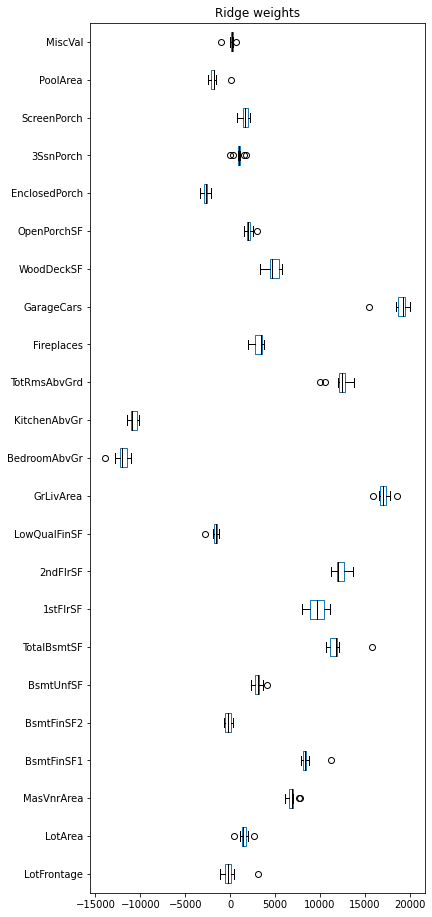

In [13]:
model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=data_numerical.columns)

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

In [14]:
weights_ridge.std()

LotFrontage      1159.029135
LotArea           568.011018
MasVnrArea        540.176313
BsmtFinSF1        992.485148
BsmtFinSF2        368.231335
BsmtUnfSF         548.208731
TotalBsmtSF      1450.617996
1stFlrSF         1018.697130
2ndFlrSF          710.796801
LowQualFinSF      415.392624
GrLivArea         737.858008
BedroomAbvGr      817.979980
KitchenAbvGr      473.151125
TotRmsAbvGrd     1127.180606
Fireplaces        624.956262
GarageCars       1305.139394
WoodDeckSF        782.887560
OpenPorchSF       433.104794
EnclosedPorch     363.718516
3SsnPorch         505.119785
ScreenPorch       423.654932
PoolArea          694.608935
MiscVal           458.443779
dtype: float64

The impact on wheights of removing `"GarageArea"` from the dataset are:

  - Completely changes the order of the most important features
  - Decreases the standard deviation (across CV folds) of the `"GarageCars"` coefficient

The ain reason for observing the previous impact on the most important weights is because

  - Both garage features are correlated and are carrying similar information.

In [15]:
import numpy as np
from sklearn.linear_model import RidgeCV

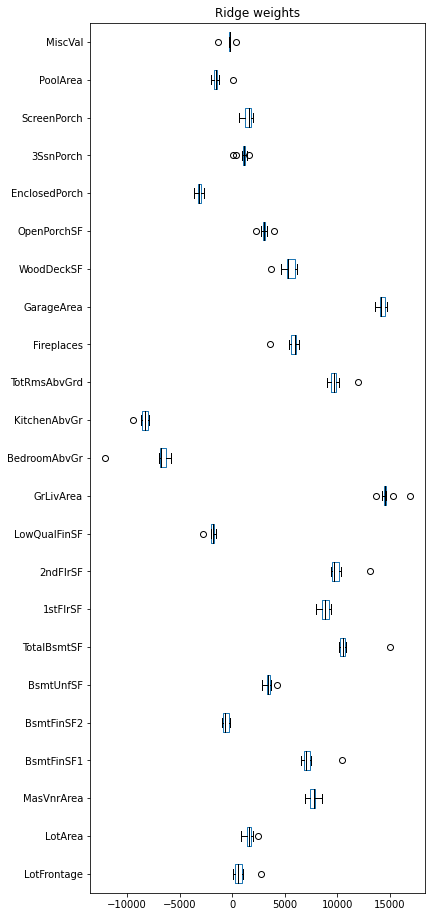

In [16]:
model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.logspace(-3, 3, num=101))
)

data_numerical = data[numerical_features]
data_numerical = data_numerical.drop(columns='GarageCars')

cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=data_numerical.columns)

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

In [17]:
weights_ridge.std()

LotFrontage       769.203078
LotArea           435.129891
MasVnrArea        536.066230
BsmtFinSF1       1128.102039
BsmtFinSF2        299.060729
BsmtUnfSF         383.663946
TotalBsmtSF      1460.241311
1stFlrSF          497.251394
2ndFlrSF         1110.999869
LowQualFinSF      348.278654
GrLivArea         847.292710
BedroomAbvGr     1795.926409
KitchenAbvGr      469.280832
TotRmsAbvGrd      853.599219
Fireplaces        811.889230
GarageArea        388.503741
WoodDeckSF        769.574894
OpenPorchSF       447.023244
EnclosedPorch     279.215691
3SsnPorch         449.568775
ScreenPorch       401.069106
PoolArea          559.266714
MiscVal           424.053506
dtype: float64

The variability decreased after tuning alpha

In [18]:
alphas = [est[-1].alpha_ for est in cv_results["estimator"]]

In [19]:
alphas

[380.1893963205613,
 380.1893963205613,
 331.13112148259074,
 331.13112148259074,
 380.1893963205613,
 380.1893963205613,
 331.13112148259074,
 331.13112148259074,
 72.44359600749891,
 380.1893963205613]

`"alpha_"` fall into for most folds between 100 and 1000

In [20]:
adult_census = pd.read_csv('./datasets/adult-census.csv')
target = adult_census['class']
data = adult_census.select_dtypes(['integer', 'floating'])
data = data.drop(columns=['education-num'])

In [21]:
data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


There are four numerical features in the dataset

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [23]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model_cv = cross_validate(model, data, target, cv=10, return_estimator=True)

dummy = DummyClassifier(strategy='most_frequent')
dummy_cv = cross_validate(dummy, data, target, cv=10)

In [24]:
pd.DataFrame([model_cv['test_score'], dummy_cv['test_score']]).T

,0,1
0,0.798567,0.760696
1,0.792835,0.760696
2,0.796683,0.760852
3,0.804873,0.760852
4,0.800369,0.760852
5,0.799140,0.760647
6,0.797502,0.760647
7,0.799345,0.760647
8,0.805078,0.760647
9,0.804054,0.760647


The linear model is substantially better than the dummy classifier

In [25]:
model_cv["estimator"]

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', Stan

In [26]:
model_cv['estimator'][-1][-1].coef_

array([[0.51673694, 2.45048914, 0.30139428, 0.53553169]])

In [27]:
weights_ridge

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,525.035223,1480.616082,8442.160636,7457.341863,-616.887230,3397.810151,10877.532233,9155.835509,9527.207171,-1715.025317,...,9566.266918,6119.991252,14084.323423,5183.263562,3212.517622,-2722.594433,1637.110935,1595.522896,-1598.896631,-192.028797
1,80.387168,1320.659685,7596.312217,7211.988149,-390.011909,3361.700470,10706.997487,8932.962298,9536.871318,-2762.595956,...,9679.607616,5956.069212,13577.014807,6043.980971,2790.396947,-3324.429727,1029.886266,646.646965,-1396.127681,-219.824924
2,490.302898,834.331140,7825.388092,7056.790270,-966.545539,3635.911571,10650.161757,8783.733261,9908.891780,-1896.558762,...,9794.862008,5940.670724,14054.813745,6079.544412,2906.422285,-3153.234076,1149.079099,1706.587443,-1464.801073,-1371.296700
3,520.917661,1958.630400,8586.101867,6900.598708,-916.297708,3264.557748,10297.496842,9440.283014,10304.047868,-1984.039392,...,9017.812284,5426.066090,13992.303033,5231.125220,3995.268459,-3051.395583,984.438674,1335.498185,-1723.744263,-187.773391
4,1078.163087,1689.375599,7051.903226,6515.595418,-256.362859,3594.754144,10207.975889,8137.126036,9385.487683,-1901.486356,...,9415.671625,6078.084468,14796.865871,4646.765544,2981.639099,-2940.645944,1088.309410,1805.129041,-1291.369364,-318.660474
5,996.903973,1428.442319,7317.383362,7486.291597,-642.120803,2845.295969,10356.053096,9294.786603,9549.432096,-1783.302126,...,8992.096079,6314.080879,14214.792988,5336.487892,3056.734894,-3061.604450,1104.219926,1076.196117,-1762.362479,-215.342764
6,256.717818,1873.615897,7730.653382,6842.365189,-171.102466,3740.713549,10777.100795,8494.731755,10371.606539,-1603.442325,...,9800.371772,5565.401039,14680.638884,6228.584283,3366.824355,-3159.880754,1403.768358,1776.747558,-1548.834735,-206.182770
7,254.217490,1467.330505,7879.770642,7074.291840,-762.306369,3123.788503,10213.770602,9340.274891,9576.004549,-1538.744760,...,9960.755247,6401.574831,14764.642390,5935.124668,3046.105867,-3665.275330,1260.629989,1599.508845,-1608.743741,-153.548001
8,2757.677533,2464.450713,6919.471643,10483.979813,-866.213841,4268.238733,15059.529239,8013.498201,13129.756627,-2054.405384,...,12017.294782,3574.442983,14156.780152,3719.479006,2236.715076,-3510.482384,132.427065,1242.295639,58.665086,336.242978
9,931.533624,1766.763405,7835.471597,6823.569949,-242.205250,3423.668467,10451.788902,8854.261090,9883.035334,-1673.822092,...,10191.237896,5603.929011,14386.400977,5253.450362,2895.124182,-2971.143567,375.365128,1970.163202,-1983.175082,-309.538654


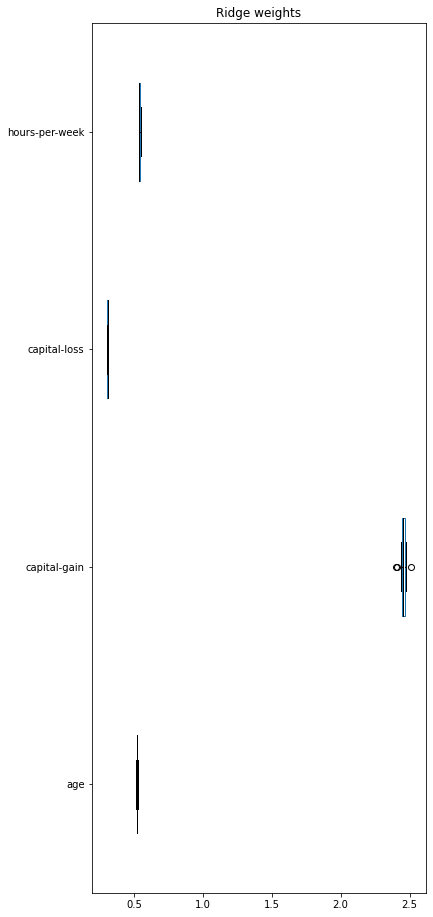

In [28]:
coefs = [est[-1].coef_.flatten() for est in model_cv["estimator"]]
weights_logistic = pd.DataFrame(coefs, columns=data.columns)

weights_logistic.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

In [29]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [30]:
coefs

[array([0.52204276, 2.4667774 , 0.30602977, 0.53963505]),
 array([0.52606692, 2.40653282, 0.30817766, 0.54182433]),
 array([0.52425661, 2.45592287, 0.30812359, 0.54384342]),
 array([0.52037496, 2.45048201, 0.30916996, 0.53459728]),
 array([0.51925928, 2.51201042, 0.30424291, 0.54671495]),
 array([0.52173216, 2.4416315 , 0.30401707, 0.54128619]),
 array([0.52023528, 2.47372277, 0.30689298, 0.53637405]),
 array([0.52395804, 2.44532129, 0.30832579, 0.53825271]),
 array([0.51645436, 2.40508701, 0.30839363, 0.53512121]),
 array([0.51673694, 2.45048914, 0.30139428, 0.53553169])]

`'capital-gain'` is the most important feaure seen by the logistic regression

In [31]:
adult_census = pd.read_csv('./datasets/adult-census.csv')
target = adult_census['class']
data = adult_census.drop(columns=['class', 'education-num'])

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

In [33]:
numerical_column_selector = selector(dtype_exclude=object)
categorical_column_selector = selector(dtype_include=object)

numerical_columns = numerical_column_selector(data)
categorical_columns = categorical_column_selector(data)

In [34]:
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

In [35]:
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)
])

In [36]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))

model_cv = cross_validate(model, data, target, cv=10, return_estimator=True)

In [37]:
preprocessor_num = ColumnTransformer([
    ('standar_scaler', numerical_preprocessor, numerical_columns)
])

model_num = make_pipeline(preprocessor_num, LogisticRegression(max_iter=5000))
model_num_cv = cross_validate(model_num, data, target, cv=10, return_estimator=True)

In [38]:
model_cv['test_score']

array([0.85281474, 0.85076766, 0.85012285, 0.84889435, 0.84889435,
       0.8466421 , 0.8548321 , 0.8511466 , 0.85872236, 0.8523751 ])

In [39]:
model_num_cv['test_score']

array([0.79856704, 0.79283521, 0.79668305, 0.80487305, 0.80036855,
       0.79914005, 0.79750205, 0.7993448 , 0.80507781, 0.80405405])

In [40]:
np.count_nonzero(model_cv['test_score'] > model_num_cv['test_score'])

10

The model using both numerical and categorical features is substantially better than the model using only numerical fetures

In [41]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_['one-hot-encoder']
                              .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns

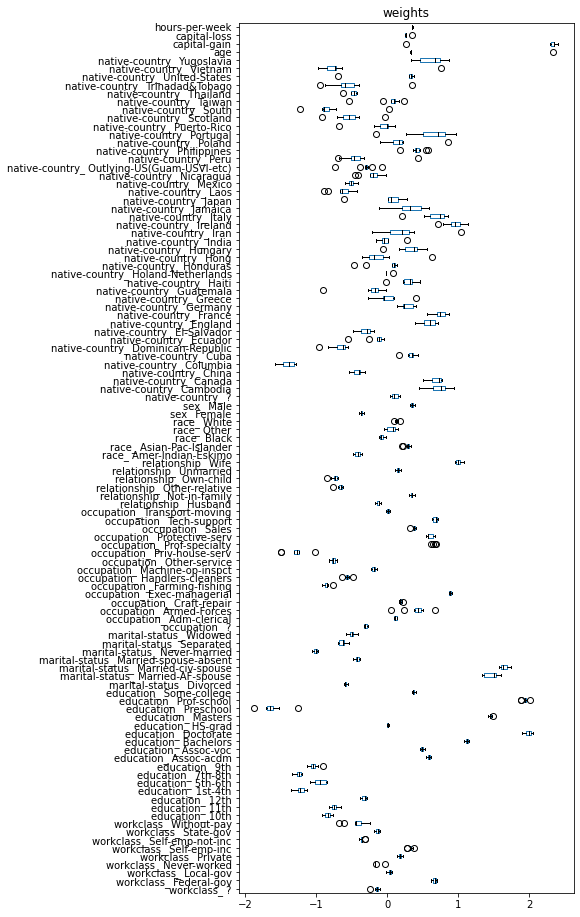

In [42]:
coefs = [est[-1].coef_.flatten() for est in model_cv["estimator"]]
weights = pd.DataFrame(coefs, columns=feature_names)

weights.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("weights")

`'capital-gain'` and `'education_Doctorate'` are the most impacting predictions of the logistic regression classifier based on the relative magnitude of its coefficients.

In [48]:
model = make_pipeline(preprocessor, LogisticRegression(C=0.4, max_iter=5000))
model_cv = cross_validate(model, data, target, cv=10, return_estimator=True)

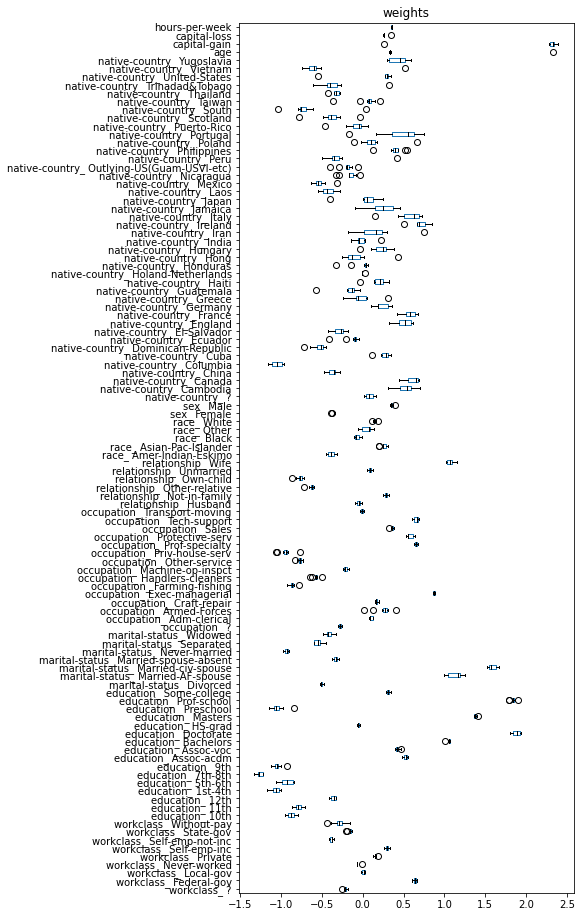

In [49]:
coefs = [est[-1].coef_.flatten() for est in model_cv["estimator"]]
weights = pd.DataFrame(coefs, columns=feature_names)

weights.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("weights")

The effect of decreasing the `'C'` parameter are the following:
  - Shrinks the magnitude of the weights towards zeros
  - Reduces the weights' variance